**1. Diseño del Experimento**

Para mejorar la fiabilidad del experimento y reducir la influencia de variables externas, se podrían implementar las siguientes mejoras:

*Aleatorización completa:* Asegurar que la asignación de los 30 estudiantes a los dos grupos sea totalmente aleatoria. Esto minimiza el sesgo de selección, garantizando que las características preexistentes de los estudiantes (como el nivel de motivación o el conocimiento previo) se distribuyan de manera equitativa.

*Aumento del tamaño muestral:* Utilizar una muestra más grande de estudiantes podría aumentar la potencia estadística del estudio, haciendo que los resultados sean más generalizables a toda la población estudiantil.

**2. Cálculo de Estadísticas Descriptivas**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
grupo_a = [85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88]
grupo_b = [70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80]

In [4]:
media_a = np.mean(grupo_a)
media_b = np.mean(grupo_b)
std_a = np.std(grupo_a, ddof=1)
std_b = np.std(grupo_b, ddof=1)

print(f"Grupo A (Tutoría) -> Media: {media_a:.2f}, Desviación Estándar: {std_a:.2f}")
print(f"Grupo B (Control) -> Media: {media_b:.2f}, Desviación Estándar: {std_b:.2f}")

Grupo A (Tutoría) -> Media: 85.87, Desviación Estándar: 4.02
Grupo B (Control) -> Media: 75.07, Desviación Estándar: 3.71


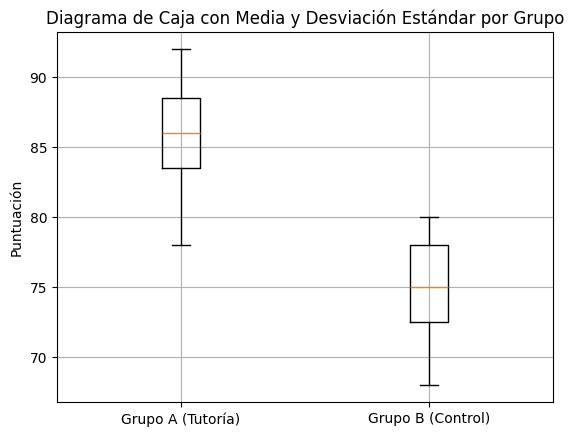

In [5]:
plt.figure()
plt.boxplot([grupo_a, grupo_b], tick_labels=['Grupo A (Tutoría)', 'Grupo B (Control)'])
plt.title('Diagrama de Caja con Media y Desviación Estándar por Grupo')
plt.ylabel('Puntuación')
plt.grid()
plt.show()

**4. Prueba de Hipótesis**

H0: El rendimiento académico entre los grupos es el mismo (media_a = media_b)

H1: El grupo con tutoría tiene un mejor rendimiento académico (media_a > media_b)

In [12]:
from scipy import stats

t_stat, p_valor = stats.ttest_ind(grupo_a, grupo_b, alternative='greater')
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_valor}")

alpha = 0.05

if p_valor < alpha:
    print("Como el valor p es menor que el nivel de significancia (0.05), rechazamos la hipótesis nula.")
else:
    print("Como el valor p es mayor que el nivel de significancia (0.05), no rechazamos la hipótesis nula.")

Estadístico t: 7.65
Valor p: 1.2395750106766606e-08
Como el valor p es menor que el nivel de significancia (0.05), rechazamos la hipótesis nula.


Hay suficiente evidencia estadística para concluir que existe una diferencia significativa en el rendimiento académico entre los dos grupos. Dado que hipótesis alternativa (H1) era que el grupo con tutoría tiene un mejor rendimiento académico (media_a > media_b), y el estadístico t es positivo (7.65), los resultados sugieren que el grupo que recibió tutoría (Grupo A) tuvo un rendimiento académico significativamente mayor que el grupo de control (Grupo B)

In [13]:
n_a = len(grupo_a)
n_b = len(grupo_b)

# Cálculo de la desviación estándar combinada
std_comb = np.sqrt(((n_a - 1) * std_a**2 + (n_b - 1) * std_b**2) / (n_a + n_b - 2))

# Cálculo del error estándar de la diferencia entre medias
se_dif = std_comb * np.sqrt((1/n_a) + (1/n_b))

# Grados de libertad
df = n_a + n_b - 2

# Cálculo el intervalo de confianza del 95%
t_crit = stats.t.ppf(1 - alpha/2, df)

lim_inf = (media_a - media_b) - t_crit * se_dif
lim_sup = (media_a - media_b) + t_crit * se_dif

print(f"Intervalo de confianza del 95% para la diferencia de medias: ({lim_inf:.2f}, {lim_sup:.2f})")

Intervalo de confianza del 95% para la diferencia de medias: (7.91, 13.69)


Con un 95% de confianza, la verdadera diferencia promedio en las puntuaciones entre los estudiantes que recibieron la tutoría (Grupo A) y los que no la recibieron (Grupo B), en la población de la que se extrajeron estas muestras, se encuentra entre 7.91 y 13.69 puntos. Se infiere que la tutoría tuvo un efecto positivo y significativo en el rendimiento académico, estimando que, en promedio, los estudiantes con tutoría obtienen entre 7.91 y 13.69 puntos más que los estudiantes sin tutoría.